# Projeto Análise de Dados sobre a Síndrome Respiratória Aguda Grave (SRAG)

Este projeto analisa os dados dos casos de síndrome respiratória aguda no estado de São Paulo do período de fevereiro de 2020 à setembro de 2021

Os dados esão disponíveis nos sites:

- https://www.seade.gov.br/coronavirus/#
- https://github.com/seade-R/dados-covid-sp
- https://www.seade.gov.br

### Importação dos dados

In [36]:
import pandas as pd
import numpy as np

In [37]:
srag_sp = pd.read_csv("../SRAG_2020.csv", sep=";", encoding="utf-8")

C:\Users\vitor\AppData\Local\Temp\ipykernel_8532\301896852.py:1: DtypeWarning: Columns (15,55,86,92,94,106,108,115,117) have mixed types. Specify dtype option on import or set low_memory=False.
  srag_sp = pd.read_csv("../SRAG_2020.csv", sep=";", encoding="utf-8")


In [38]:
srag_sp.head(1)

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,...,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT
0,12/30/2019,F,52,3,3052,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,...,1,12/29/2019,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,CATANDUVA,351110,HOSP ESCOLA EMILIO CARLOS CATANDUVA,2089335


In [39]:
# Na tabela existem 106651 linhas e 133 colunas
srag_sp.shape

(106651, 133)

### Tratamento dos dados

##### Excluindo variáveis

In [46]:
# Definido uma lista com um range entre 50 e 132
lista = list(range(50, 133))


In [47]:
# Com o tamanho da lista definido vamos retirar com "drop" as colunas da tabela dentro desse range
srag_mod = srag_sp.drop(srag_sp.columns[lista], axis=1)

In [84]:
srag_mod.head(10)

,data,sexo,NU_IDADE_N,TP_IDADE,ID_MN_RESI,CS_ZONA,CS_GESTANT,raca,CS_ETINIA,CS_ESCOL_N,...,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA
0,2019-12-30,F,52,3,CATANDUVA,urbana,9,ignorado,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,1.0,5/10/2019,NaN,None,NaN
1,2020-01-02,M,7,2,SAO PAULO,urbana,6,ignorado,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,None,NaN,None,NaN
2,2019-12-29,F,22,3,CAMPINAS,urbana,1,ignorado,NaN,9.0,...,2.0,2.0,NaN,2.0,NaN,1.0,8/17/2019,NaN,None,NaN
3,2019-12-31,M,75,3,SAO BERNARDO DO CAMPO,urbana,6,ignorado,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,9.0,None,NaN,None,NaN
4,2020-01-02,F,1,3,CANDIDO MOTA,urbana,6,branca,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,None,NaN,None,NaN
5,2020-01-02,F,30,3,SAO JOSE DO RIO PRETO,urbana,5,branca,NaN,3.0,...,2.0,2.0,NaN,1.0,NaN,1.0,2/1/2019,NaN,None,NaN
6,2020-01-02,F,45,3,SAO PAULO,urbana,9,ignorado,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,9.0,None,NaN,None,NaN
7,2020-01-03,M,20,3,NOVA GRANADA,urbana,6,branca,NaN,1.0,...,2.0,2.0,NaN,1.0,DOENCA PULMONAR INTERS DIFUSA,2.0,None,NaN,None,NaN
8,2020-01-02,M,7,3,SAO PAULO,urbana,6,parda,NaN,1.0,...,2.0,2.0,NaN,1.0,BRONQUITE,2.0,None,NaN,None,NaN
9,2020-01-02,M,88,3,TAQUARITINGA,urbana,6,branca,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,9.0,None,NaN,None,NaN


In [49]:
srag_mod.shape

(106651, 50)

In [50]:
srag_mod = srag_mod.drop(columns=["CO_PAIS", "ID_PAIS", "COD_IDADE", "SG_UF", "ID_RG_RESI", "CO_RG_RESI", "CO_MUN_RES"], inplace=False)

##### Renomeando Variáveis

In [87]:
srag_mod = srag_mod.rename(columns={"DT_NOTIFIC": "data", "CS_SEXO": "sexo", "NU_IDADE": "idade", "CS_RACA": "raca"})

In [53]:
srag_mod.head(3)

,data,sexo,NU_IDADE_N,TP_IDADE,ID_MN_RESI,CS_ZONA,CS_GESTANT,raca,CS_ETINIA,CS_ESCOL_N,...,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA
0,12/30/2019,F,52,3,CATANDUVA,1.0,9,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,1.0,5/10/2019,NaN,None,NaN
1,1/2/2020,M,7,2,SAO PAULO,1.0,6,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,None,NaN,None,NaN
2,12/29/2019,F,22,3,CAMPINAS,1.0,1,9.0,NaN,9.0,...,2.0,2.0,NaN,2.0,NaN,1.0,8/17/2019,NaN,None,NaN


##### Analisando os tipos de variáveis

In [54]:
srag_mod.dtypes

data           object
sexo           object
NU_IDADE_N      int64
TP_IDADE        int64
ID_MN_RESI     object
CS_ZONA       float64
CS_GESTANT      int64
raca          float64
CS_ETINIA      object
CS_ESCOL_N    float64
SURTO_SG      float64
NOSOCOMIAL    float64
AVE_SUINO     float64
FEBRE         float64
TOSSE         float64
GARGANTA      float64
DISPNEIA      float64
DESC_RESP     float64
SATURACAO     float64
DIARREIA      float64
VOMITO        float64
OUTRO_SIN     float64
OUTRO_DES      object
PUERPERA      float64
CARDIOPATI    float64
HEMATOLOGI    float64
SIND_DOWN     float64
HEPATICA      float64
ASMA          float64
DIABETES      float64
NEUROLOGIC    float64
PNEUMOPATI    float64
IMUNODEPRE    float64
RENAL         float64
OBESIDADE     float64
OBES_IMC      float64
OUT_MORBI     float64
MORB_DESC      object
VACINA        float64
DT_UT_DOSE     object
MAE_VAC       float64
DT_VAC_MAE     object
M_AMAMENTA    float64
dtype: object

In [55]:
srag_mod["data"] = srag_mod["data"].astype("datetime64[D]")

In [56]:
srag_mod.dtypes

data          datetime64[ns]
sexo                  object
NU_IDADE_N             int64
TP_IDADE               int64
ID_MN_RESI            object
CS_ZONA              float64
CS_GESTANT             int64
raca                 float64
CS_ETINIA             object
CS_ESCOL_N           float64
SURTO_SG             float64
NOSOCOMIAL           float64
AVE_SUINO            float64
FEBRE                float64
TOSSE                float64
GARGANTA             float64
DISPNEIA             float64
DESC_RESP            float64
SATURACAO            float64
DIARREIA             float64
VOMITO               float64
OUTRO_SIN            float64
OUTRO_DES             object
PUERPERA             float64
CARDIOPATI           float64
HEMATOLOGI           float64
SIND_DOWN            float64
HEPATICA             float64
ASMA                 float64
DIABETES             float64
NEUROLOGIC           float64
PNEUMOPATI           float64
IMUNODEPRE           float64
RENAL                float64
OBESIDADE     

##### Analisando valores missing (NAAN)

In [57]:
srag_mod.isnull().sum()

data               0
sexo               0
NU_IDADE_N         0
TP_IDADE           0
ID_MN_RESI        11
CS_ZONA        13868
CS_GESTANT         0
raca           20150
CS_ETINIA     106635
CS_ESCOL_N     31001
SURTO_SG       16455
NOSOCOMIAL     21210
AVE_SUINO      17930
FEBRE           9112
TOSSE           7665
GARGANTA       21588
DISPNEIA       10051
DESC_RESP      14583
SATURACAO      14773
DIARREIA       24712
VOMITO         25970
OUTRO_SIN      27766
OUTRO_DES      75238
PUERPERA       67470
CARDIOPATI     53172
HEMATOLOGI     66906
SIND_DOWN      67257
HEPATICA       67122
ASMA           65900
DIABETES       57821
NEUROLOGIC     65207
PNEUMOPATI     65296
IMUNODEPRE     66160
RENAL          66000
OBESIDADE      66436
OBES_IMC      103274
OUT_MORBI      59147
MORB_DESC      79484
VACINA         18262
DT_UT_DOSE         0
MAE_VAC       105603
DT_VAC_MAE         0
M_AMAMENTA    105840
dtype: int64

##### Contagem das classificações de raças

In [58]:
srag_mod.raca.value_counts().sort_index()

1.0    45667
2.0     5518
3.0     1165
4.0    19775
5.0       86
9.0    14290
Name: raca, dtype: int64

In [59]:
# Preenchendo valores missing com número 9 (ignorado)
srag_mod.raca.fillna(9, inplace=True)

In [60]:
srag_mod.raca.value_counts().sort_index()

1.0    45667
2.0     5518
3.0     1165
4.0    19775
5.0       86
9.0    34440
Name: raca, dtype: int64

##### Contagem das classificações de CS_ZONA

In [61]:
srag_mod.CS_ZONA.value_counts().sort_index()

1.0    91232
2.0     1362
3.0      189
Name: CS_ZONA, dtype: int64

In [62]:
# Preenchendo valores missing com o número 9 (ignorado)
srag_mod.CS_ZONA.value_counts().sort_index()

1.0    91232
2.0     1362
3.0      189
Name: CS_ZONA, dtype: int64

##### Substituindo as classificações numéricas por palavras

In [63]:
srag_mod.raca = srag_mod.raca.replace({
    1: "branca",
    2: "preta",
    3: "amarela",
    4: "parda",
    5: "indígena",
    9: "ignorado"
})

In [64]:
srag_mod.raca.value_counts().sort_index()

amarela      1165
branca      45667
ignorado    34440
indígena       86
parda       19775
preta        5518
Name: raca, dtype: int64

In [65]:
srag_mod.CS_ZONA = srag_mod.CS_ZONA.replace({
    1: "urbana",
    2: "rural",
    3: "periurbana",
    9: "ignorado"
})

In [66]:
srag_mod.CS_ZONA.value_counts().sort_index()

periurbana      189
rural          1362
urbana        91232
Name: CS_ZONA, dtype: int64

### Gráfico de barras

#### Matplotlib

In [67]:
import matplotlib.pyplot as plt

In [70]:
grafico_barras = srag_mod.sexo.value_counts()
grafico_barras

M    57629
F    49002
I       20
Name: sexo, dtype: int64

In [71]:
grafico_barras.index

Index(['M', 'F', 'I'], dtype='object')

##### Gráfico vertical

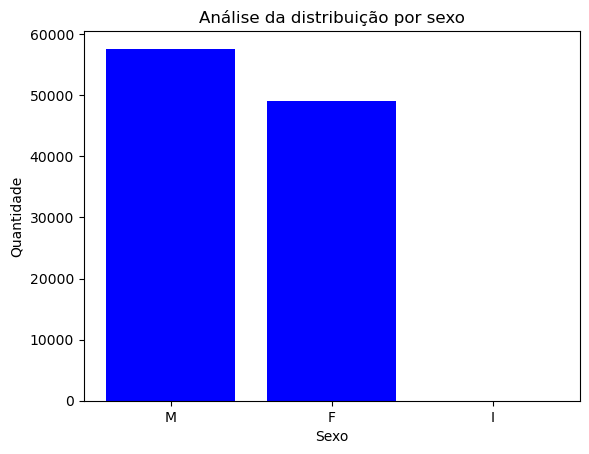

In [74]:
plt.bar(grafico_barras.index, grafico_barras, color="blue")
plt.title("Análise da distribuição por sexo")
plt.ylabel("Quantidade")
plt.xlabel("Sexo")
plt.show()

##### Gráfico horizontal

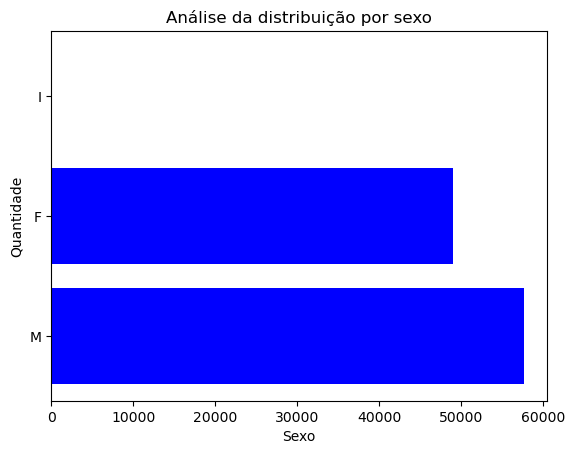

In [75]:
plt.barh(grafico_barras.index, grafico_barras, color="blue")
plt.title("Análise da distribuição por sexo")
plt.ylabel("Quantidade")
plt.xlabel("Sexo")
plt.show()

#### Seaborn

In [77]:
import seaborn as sns

<Axes: xlabel='sexo', ylabel='count'>

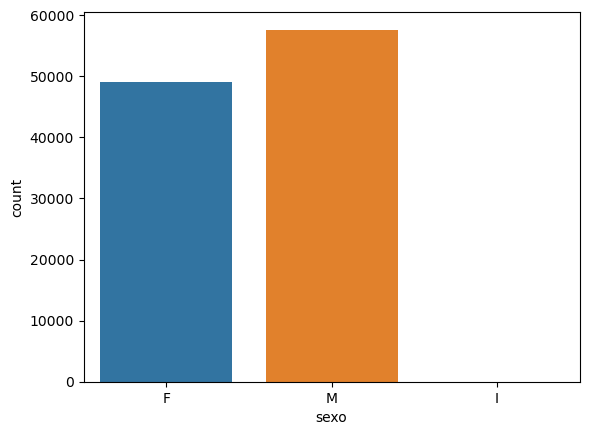

In [80]:
# Passar em "x" o valor do eixo X (nesse caso sexo), e passar em "data" a base de dados
sns.countplot(x="sexo", data=srag_mod)

Text(0, 0.5, 'Quantidade')

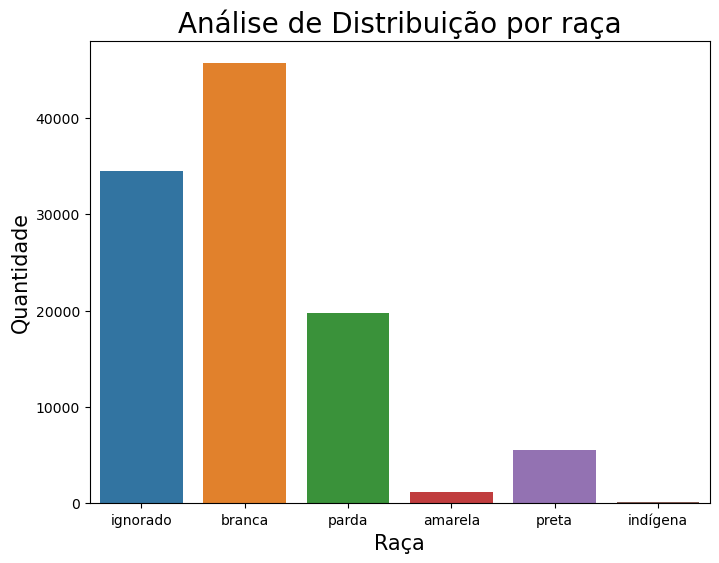

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="raca", data=srag_mod)
ax.set_title("Análise de Distribuição por raça", fontdict={"fontsize": 20})
ax.set_xlabel("Raça", fontdict={"fontsize": 15})
ax.set_ylabel("Quantidade", fontdict={"fontsize": 15})

In [82]:
import plotly.express as px

Box Plot para idade em anos

In [83]:
srag_mod.TP_IDADE.value_counts().sort_index()

1       299
2      2316
3    104036
Name: TP_IDADE, dtype: int64

In [91]:
srag_mod = srag_mod.rename(columns={"NU_IDADE_N": "idade"})

In [90]:
srag_mod.dtypes

AttributeError: 'DataFrame' object has no attribute 'idade'